#Step 1: Type Date
#Step 2: Press the play button
#Step 3: Upload two sheets (Attendance ,Students input)

Note: Everytime you reuse this application don't forget to clean the content folder.

In [ ]:
from google.colab import files
uploded= files.upload()
 
import pandas as pd
 
Attendance= pd.read_excel('Attendance.xlsx').fillna(0)
students_input= pd.read_excel('Students input.xlsx').fillna(0)
 
date= '2020-09-11' #@param {type:"date"}
Attendance[date]=0
 
 
i=1
while i <= len(students_input):
    j=1
    while j <= len(Attendance):
        if students_input.iloc[i-1,students_input.columns.get_loc("Students ID")] == Attendance.iloc[j-1, Attendance.columns.get_loc("Student ID")] :
                Attendance.iloc[j-1, Attendance.columns.get_loc(date)]="Present"
        elif Attendance.iloc[j-1, Attendance.columns.get_loc(date)] != "Present" :
                Attendance.iloc[j-1, Attendance.columns.get_loc(date)]="Absent"
        j += 1
        
    i += 1
 

with pd.ExcelWriter('Attendance.xlsx') as writer:  
    Attendance.to_excel(writer, sheet_name='Attendance',index=False)
 
files.download('Attendance.xlsx')

Attendance.replace(["Present","Absent"], [1,0])
Attendance["Total Present"]=Attendance.replace(["Present","Absent"], [1,0]).iloc[:, Attendance.columns.get_loc("Student ID")+1:Attendance.columns.get_loc(date)+1].sum(axis=1)
Attendance["Percent Present"]=Attendance["Total Present"]*100/(len(Attendance.columns)-3)


reportname = 'Attendance Report '+date +'.xlsx'

with pd.ExcelWriter(reportname) as writer:  
    Attendance.to_excel(writer, sheet_name='Attendance Report',index=False)

files.download(reportname)


Saving Attendance.xlsx to Attendance.xlsx
Saving Students input.xlsx to Students input.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Get report of a particular student
#Type the Student Id & Press the play button

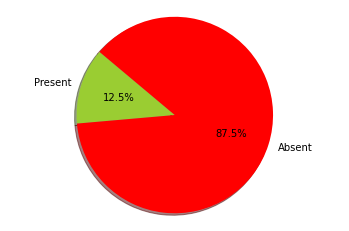

,Student Name,Student ID,2020-09-17,2020-09-19,2020-09-20,2320-09-07,2020-09-07,2020-09-08,2020-09-10,2020-09-11,Total Present,Percent Present
4,Al Eshu,43217,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Present,1,12.5


In [ ]:
student_id =  43217 #@param {type:"number"}

ID_Present= Attendance["Total Present"].iloc[Attendance[Attendance["Student ID"]==student_id].index.values]
ID_Absent= (len(Attendance.columns)-4-ID_Present)

import matplotlib.pyplot as plt

# Data to plot
labels = 'Present', 'Absent'
sizes = [int(ID_Present), int(ID_Absent)]
colors = ['yellowgreen', 'red']
explode = ( 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.show()

Attendance.iloc[Attendance[Attendance["Student ID"]==student_id].index.values,:]

#Get the Sum of total students present
#Type Teacher Name & press the play button

In [ ]:
Teacher_Name = "Ashfaq" #@param {type:"string"}
sum=Attendance['Total Present'].sum(axis = 0, skipna = True) 
print("Teacher Name: "+ Teacher_Name +"\nSum of total students present "+str(sum))


Teacher Name: Ashfaq
Sum of total students present 18


#See Report :
#Press the play button

In [ ]:
Attendance

,Student Name,Student ID,2020-09-17,2020-09-19,2020-09-20,2320-09-07,2020-09-07,2020-09-08,2020-09-10,2020-09-11,Total Present,Percent Present
0,ranjan,43213,Present,Present,Present,Present,Present,Present,Present,Present,8,100.0
1,bappy,43214,Present,Present,Present,Absent,Absent,Absent,Absent,Absent,3,37.5
2,hrb,43215,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,0,0.0
3,iori,43216,Present,Present,Present,Absent,Absent,Absent,Absent,Absent,3,37.5
4,Al Eshu,43217,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Present,1,12.5
5,Hansu,43219,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,0,0.0
6,Hansika,43210,Present,Present,Present,Absent,Absent,Absent,Absent,Absent,3,37.5
7,Hanss,43211,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,0,0.0
